In [3]:
import pandas as pd
from collections import Counter
from itertools import chain
import pm4py

In [4]:
df_verslagen_clean = pd.read_csv('a:/df_verslagen_cleaned.csv')
df_verslagen_clean.head()

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,verslagen_report_content_cleaned,content_words,content_words_lemmatized
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,dhr aj dingemans huisarts streetname nr city d...,"['dhr', 'aj', 'dingemans', 'huisarts', 'street...","['dhr', 'aj', 'dingemans', 'huisarts', 'street..."
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",Samenvatting: \nRectaal bloedverlies obv diver...,2020-11-26 09:53:00,samenvatting rectaal bloedverlies obv divertik...,"['samenvatting', 'rectaal', 'bloedverlies', 'o...","['samenvatting', 'rectaal', 'bloedverlie', 'ob..."
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,COLOSCOPIE\r\n\r\nBetreft\r\nMw. [INITIALS] [L...,2020-11-25 14:13:00,coloscopie betreft mw initials lastname adresg...,"['coloscopie', 'betreft', 'mw', 'initials', 'l...","['coloscopie', 'betreffen', 'mw', 'initials', ..."
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,GASTROSCOPIE\r\n\r\nBetreft\r\nMw. [INITIALS] ...,2020-11-25 13:48:00,gastroscopie betreft mw initials lastname adre...,"['gastroscopie', 'betreft', 'mw', 'initials', ...","['gastroscopie', 'betreffen', 'mw', 'initials'..."
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",Samenvatting: \nRectaal bloedverlies ; eenmali...,2020-11-25 08:47:00,samenvatting rectaal bloedverlies eenmalig hd ...,"['samenvatting', 'rectaal', 'bloedverlies', 'e...","['samenvatting', 'rectaal', 'bloedverlie', 'ee..."


In [5]:
df_verslagen = pd.read_csv("A:/bloeding-met-patientenlijst-alle-soorten-verslagen/bloeding-met-patientenlijst-4-verslagen.csv")

df_verslagen = df_verslagen.drop(columns=['verslagen_report_content'])
df_verslagen.head()

,pseudo_id,verslagen_report_tags,verslagen_report_start_date
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Polikliniek: eerste consult",2022-02-01 08:33:00
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,2021-12-21 15:13:00
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Polikliniek: vervolgconsult",2021-12-21 14:50:00
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Radiologieverslag, ECG",2021-12-16 00:00:00
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Radiologieverslag, Thorax",2021-12-07 00:00:00


In [6]:
# Step 1: Sort by Patient_ID and Timestamp
df_verslagen = df_verslagen.sort_values(by=['pseudo_id', 'verslagen_report_start_date'])

# Step 2: Create a list of sequences for each patient
patient_sequences = df_verslagen.groupby('pseudo_id')['verslagen_report_tags'].apply(lambda x: '->'.join(x))

# Step 3: Count the occurrences of each unique sequence
sequence_counts = Counter(patient_sequences)

# Step 4: Convert to DataFrame for better visualization
sequence_df = pd.DataFrame(sequence_counts.items(), columns=['Sequence', 'Count'])

# Step 5: Sort by most frequent sequences
sequence_df = sequence_df.sort_values(by='Count', ascending=False)

print(sequence_df)


                                              Sequence  Count
0    Radiologieverslag, Thorax->Radiologieverslag, ...      1
1    Radiologieverslag, Thorax->Radiologieverslag, ...      1
2    Radiologieverslag, Thorax->Radiologieverslag, ...      1
3    Radiologieverslag, Cervicale wervelkolom, Scho...      1
4    Radiologieverslag, Dotter aortabekkenbenen Bei...      1
..                                                 ...    ...
100  Radiologieverslag, Elleboog APLAT Rechts->Radi...      1
101  Radiologieverslag, Lumbale Wk APLAT->Radiologi...      1
102  Radiologieverslag, Buikoverzicht, Echo bovenbu...      1
103  Radiologieverslag, Echo bovenbuik, Thorax->Rad...      1
104  Radiologieverslag, Bekkenheupen->Radiologiever...      1

[105 rows x 2 columns]


In [7]:
# Flatten all steps into a single list
all_steps = list(chain(*df_verslagen.groupby('pseudo_id')['verslagen_report_tags'].apply(list)))

# Count step frequency
step_counts = Counter(all_steps)
print(step_counts)


Counter({'Consult': 6702, 'Consult, Kliniek: vervolgconsult': 5958, 'Consult, Polikliniek: vervolgconsult': 4304, 'Zorgportaal Ja': 2464, 'Consult, Overige aantekeningen': 1645, 'Consult, SEH': 1240, 'Poliklinische Brief': 1168, 'Consult, Polikliniek: eerste consult': 1070, 'Consult, Telefonisch consult': 925, 'Microbiologieverslag': 900, 'Zorgportaal Nee': 896, 'Radiologieverslag, Thorax': 697, 'Klinische Brief': 592, 'Consult, Kliniek: eerste consult': 547, 'Spoedeisende Hulp': 342, 'Pathologieverslag': 299, 'Consult, Intercollegiaal consult': 268, 'Consult, Multidisciplinair overleg': 217, 'Verpleegkunde': 185, 'Algemeen': 148, 'Radiologieverslag, Echo abdomen': 140, 'Consult, Operatie verslag': 136, 'Radiologieverslag, Bekken/heupen': 131, 'Radiologieverslag, ECG': 103, 'Consult, Preoperatieve screening': 78, 'Radiologieverslag, CT schedel': 73, 'Nazorg': 70, 'Gastroscopie klinisch': 69, 'Radiologieverslag, Echodoppler': 65, 'Radiologieverslag, Knie rechts': 64, 'Echodoppler': 64, 

In [8]:
# pip install pm4py

In [9]:
# Convert DataFrame to PM4Py event log
event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='verslagen_report_tags', timestamp_key='verslagen_report_start_date')

print(event_log.head())  # Verify format

                                  pseudo_id  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   

                               verslagen_report_tags  \
0                          Radiologieverslag, Thorax   
1                          Radiologieverslag, Thorax   
2  Radiologieverslag, Bekkenheupen, Echo bovenbui...   
3  Radiologieverslag, Bekkenheupen, Lumbale werve...   
4                          Radiologieverslag, Thorax   

  verslagen_report_start_date                         case:concept:name  \
0   1998-05-12 00:00:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
1   1998-10-26 00:00:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
2   1998-10-26 00:00:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
3   1998-10-26 00:00:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
4   1

In [10]:
# import pm4py

# log = event_log
# # Discover Petri net using the inductive miner
# net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
# # Visualize the Petri net
# pm4py.view_petri_net(net, initial_marking, final_marking)


In [11]:
case_duration = pm4py.get_all_case_durations(df_verslagen)
print(case_duration)

[3194700.0, 80149380.0, 80844180.0, 92674080.0, 167021520.0, 206324640.0, 238355460.0, 242315700.0, 288639240.0, 326593740.0, 343151100.0, 409429920.0, 418491720.0, 460220760.0, 461585520.0, 476983500.0, 492450900.0, 509899800.0, 529947780.0, 542635800.0, 582529200.0, 592227120.0, 600611040.0, 603125220.0, 612803760.0, 615129840.0, 615296040.0, 619539300.0, 621344400.0, 621852000.0, 622216440.0, 628446900.0, 628646400.0, 630841980.0, 636292980.0, 636313200.0, 637258320.0, 637605900.0, 641126160.0, 643562160.0, 651680700.0, 653575020.0, 654791700.0, 655217340.0, 655655520.0, 657046380.0, 659523600.0, 660235560.0, 667319460.0, 668945760.0, 668961060.0, 673351800.0, 673535220.0, 675338940.0, 676296300.0, 678122400.0, 684771300.0, 689632980.0, 696194940.0, 696442020.0, 697549440.0, 702484320.0, 704202420.0, 705501300.0, 706952880.0, 707918940.0, 709044240.0, 709051380.0, 710262840.0, 717587700.0, 721574280.0, 722935800.0, 730570080.0, 731504220.0, 731857860.0, 735651660.0, 738597720.0, 740

In [12]:
start_activities = pm4py.get_start_activities(event_log)
start_activities

{'Radiologieverslag, Thorax': 18,
 'Radiologieverslag, Cervicale wervelkolom, Schouder Beiderzijds': 1,
 'Radiologieverslag, Dotter aortabekkenbenen Beiderzijds, iv DSA buikbeenvaten': 2,
 'Radiologieverslag, BOZ Staand': 1,
 'Zorgportaal Nee': 5,
 'Radiologieverslag, Elleboogonderarm Beiderzijds, Handpols Beiderzijds': 1,
 'Radiologieverslag, Cervicale wervelkolom': 2,
 'Radiologieverslag, Enkelvoet Beiderzijds': 5,
 'Radiologieverslag, Lumbale wervelkolom': 3,
 'Radiologieverslag, Echo bovenbuik': 4,
 'Radiologieverslag, Bekken/heupen, Lumbale wervelkolom (lwk)': 1,
 'Radiologieverslag, Doorl. OKAFD.': 1,
 'Radiologieverslag, Thorax PALAT': 3,
 'Radiologieverslag, Echo Onderste Extr. Links, Enkel APLAT Links': 1,
 'Radiologieverslag, Bekkenheupen, Lumbale wervelkolom': 1,
 'Radiologieverslag, Echo bovenbuik, ia dir. punctie beenvaten Beiderzijds, Thorax': 1,
 'Radiologieverslag, MRI Hersenen, MRI Orbita': 1,
 'Radiologieverslag, Echo aorta diameter aneurysma': 1,
 'Radiologieverslag,

In [13]:
end_activities = pm4py.get_end_activities(event_log)
end_activities

{'Consult, Polikliniek: eerste consult': 2,
 'Consult, Telefonisch consult': 14,
 'Poliklinische Brief': 30,
 'Consult, Polikliniek: vervolgconsult': 27,
 'Consult, Thuisbehandeling': 1,
 'Consult, Overige aantekeningen': 7,
 'Spoedeisende Hulp': 1,
 'Consult, Kliniek: vervolgconsult': 4,
 'Consult': 4,
 'Zorgdomein verwijzingen, Aanvraagformulieren, pdf': 1,
 'Consult, Intercollegiaal consult': 1,
 'Radiologieverslag, Knie rechts': 1,
 'Klinische Brief': 6,
 'Algemeen': 3,
 'Radiologieverslag, Thorax': 1,
 'Consult, Preoperatieve screening': 1,
 'Consult, SEH': 1}

In [14]:
# for filtering based on time
filtered_log = pm4py.filter_time_range(df_verslagen, "2023-01-01 00:00:00", "2023-12-31 23:59:59")
# for filtering based on performance filters
filtered_log = pm4py.filter_case_performance(df_verslagen, min_performance=100, max_performance=1000000)

filtered_log

,pseudo_id,verslagen_report_tags,verslagen_report_start_date,case:concept:name,concept:name,time:timestamp


In [15]:
pm4py.view_dotted_chart(event_log)

In [16]:
case_arrival = pm4py.get_case_arrival_average(df_verslagen)
case_arrival

np.float64(7751907.692307692)

In [17]:
# from pm4py.algo.filtering.log.variants import variants_filter
# # from pm4py.objects.conversion.log import converter as log_converter

# log = event_log

# # Extract unique variants (patient journey patterns)
# variants = variants_filter.get_variants(log)
# trace_list = ['->'.join(trace) for trace in variants.keys()]

# # Create a DataFrame mapping traces to frequency
# trace_counts = {trace: len(variants[trace]) for trace in trace_list}
# trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# # Sort by most common traces
# trace_df = trace_df.sort_values(by='Count', ascending=False)
# print(trace_df.head())  # Show most common patient journeys

from pm4py.algo.filtering.log.variants import variants_filter

# Extract unique variants (patient journey patterns)
variants = variants_filter.get_variants(event_log)

# Map original tuple traces to string traces
trace_mapping = {tuple(trace): '->'.join(trace) for trace in variants.keys()}

# Create a DataFrame mapping traces to frequency
trace_counts = {trace_mapping[trace]: len(variants[trace]) for trace in variants.keys()}

# Convert to DataFrame
trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# Sort by most common traces
trace_df = trace_df.sort_values(by='Count', ascending=False)

print(trace_df)  # Show most common patient journeys



                                                 Trace  Count
0    Radiologieverslag, Thorax->Radiologieverslag, ...      1
1    Radiologieverslag, Thorax->Radiologieverslag, ...      1
2    Radiologieverslag, Thorax->Radiologieverslag, ...      1
3    Radiologieverslag, Cervicale wervelkolom, Scho...      1
4    Radiologieverslag, Dotter aortabekkenbenen Bei...      1
..                                                 ...    ...
100  Radiologieverslag, Elleboog APLAT Rechts->Radi...      1
101  Radiologieverslag, Lumbale Wk APLAT->Radiologi...      1
102  Radiologieverslag, Buikoverzicht, Echo bovenbu...      1
103  Radiologieverslag, Echo bovenbuik, Thorax->Rad...      1
104  Radiologieverslag, Bekkenheupen->Radiologiever...      1

[105 rows x 2 columns]


In [18]:
trace_df

,Trace,Count
0,"Radiologieverslag, Thorax->Radiologieverslag, ...",1
1,"Radiologieverslag, Thorax->Radiologieverslag, ...",1
2,"Radiologieverslag, Thorax->Radiologieverslag, ...",1
3,"Radiologieverslag, Cervicale wervelkolom, Scho...",1
4,"Radiologieverslag, Dotter aortabekkenbenen Bei...",1
...,...,...
100,"Radiologieverslag, Elleboog APLAT Rechts->Radi...",1
101,"Radiologieverslag, Lumbale Wk APLAT->Radiologi...",1
102,"Radiologieverslag, Buikoverzicht, Echo bovenbu...",1
103,"Radiologieverslag, Echo bovenbuik, Thorax->Rad...",1


In [19]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
from sklearn.cluster import KMeans
import numpy as np

# Convert event log to feature vectors
feature_table, feature_names = log_to_features.apply(event_log, parameters={"feature_type": "frequency"})

# Convert to DataFrame
feature_df = pd.DataFrame(feature_table, columns=feature_names)

# Apply K-Means clustering (set k=3 for 3 clusters)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
feature_df['Cluster'] = kmeans.fit_predict(feature_df)

print(feature_df.head())  # Show clustered patient traces


c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fea_df[new_col] = fea_df[case_id_key].isin(filt_df_cases)
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fea_df[new_col] = fea_df[case_id_key].isin(filt_df_cases)
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-package

   concept:name_Radiologieverslag,Thorax  \
0                                    1.0   
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   

   concept:name_Radiologieverslag,Bekkenheupen,Echobovenbuik,KnieonderbeenBeiderzijds  \
0                                                1.0                                    
1                                                0.0                                    
2                                                0.0                                    
3                                                0.0                                    
4                                                0.0                                    

   concept:name_Radiologieverslag,Bekkenheupen,Lumbalewervelkolom  \
0                                                1.0                
1                                                0.0          

c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Het systeem kan het opgegeven bestand niet vinden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executabl

In [20]:
import plotly.graph_objects as go
from collections import Counter

# Extract most common sequence per cluster
cluster_sequences = feature_df.groupby("Cluster").sum().idxmax(axis=1)
cluster_counts = Counter(cluster_sequences)

# Sankey Diagram Data Preparation
sources, targets = [], []
for trace in cluster_sequences.values:
    steps = trace.split("->")
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert to indices
all_nodes = list(set(sources + targets))
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=list(cluster_counts.values()))
))
fig.show()


In [21]:
# pip install plotly

In [22]:
# !pip install --upgrade nbformat

In [23]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10  # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df = sub_trace_df.sort_values(by='Count', ascending=False)

print(sub_trace_df.head(10))  # Show most common sub-traces


                                              Sub-Trace  Count
3729  Consult, Kliniek: vervolgconsult->Consult, Kli...     77
179   Consult->Consult->Consult->Consult->Consult->C...     45
3730  Consult, Kliniek: vervolgconsult->Consult, Kli...     18
6367  Consult, Kliniek: vervolgconsult->Consult, Kli...     14
851   Consult->Consult->Consult->Consult->Consult->C...     12
6368  Consult, Kliniek: vervolgconsult->Consult, Kli...     11
6366  Consult->Consult, Kliniek: vervolgconsult->Con...     11
879   Consult->Consult->Consult->Consult, Poliklinie...      9
852   Consult->Consult->Consult->Consult->Consult->C...      9
4346  Consult, Kliniek: vervolgconsult->Consult, Kli...      9


In [24]:
sub_trace_df

,Sub-Trace,Count
3729,"Consult, Kliniek: vervolgconsult->Consult, Kli...",77
179,Consult->Consult->Consult->Consult->Consult->C...,45
3730,"Consult, Kliniek: vervolgconsult->Consult, Kli...",18
6367,"Consult, Kliniek: vervolgconsult->Consult, Kli...",14
851,Consult->Consult->Consult->Consult->Consult->C...,12
...,...,...
33309,Consult->Zorgportaal Ja->Consult->Zorgportaal ...,1
33310,Zorgportaal Ja->Consult->Zorgportaal Ja->Patie...,1
33311,Consult->Zorgportaal Ja->Patient->Zorgportaal ...,1
33312,Zorgportaal Ja->Patient->Zorgportaal Ja->Cardi...,1


In [25]:
sub_trace_df.iloc[10][0]

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_23940\3598988830.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



'Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult'

In [26]:
def diversity_score(sub_trace_counts):
    unique_sub_traces = len(sub_trace_counts)
    total_sub_traces = sum(sub_trace_counts.values())
    return unique_sub_traces / total_sub_traces  # Ratio of unique sequences

for n in range(2, 10):
    all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, n)]
    sub_trace_counts = Counter(all_sub_traces)
    
    score = diversity_score(sub_trace_counts)
    print(f"Window Size {n}: Diversity Score = {score:.4f}")


Window Size 2: Diversity Score = 0.1153
Window Size 3: Diversity Score = 0.2772
Window Size 4: Diversity Score = 0.4887
Window Size 5: Diversity Score = 0.6861
Window Size 6: Diversity Score = 0.8226
Window Size 7: Diversity Score = 0.9031
Window Size 8: Diversity Score = 0.9463
Window Size 9: Diversity Score = 0.9694


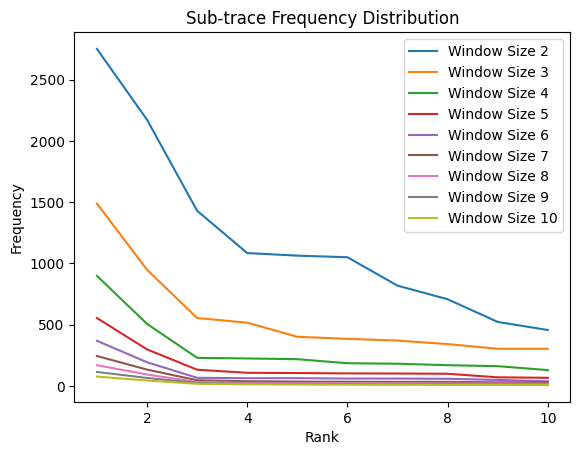

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to test different window sizes
def test_window_sizes(trace_list, max_n=10):
    for window_size in range(2, max_n + 1):
        all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
        sub_trace_counts = Counter(all_sub_traces)
        
        # Get top 10 frequent sub-traces
        top_counts = sorted(sub_trace_counts.values(), reverse=True)[:10]
        
        plt.plot(range(1, len(top_counts) + 1), top_counts, label=f'Window Size {window_size}')

    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Sub-trace Frequency Distribution')
    plt.legend()
    plt.show()

test_window_sizes(trace_list)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert full traces into "sentences" (for NLP processing)
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Cluster Traces Using K-Means
num_clusters = 3  # Change based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
trace_clusters = kmeans.fit_predict(X)

# Add cluster labels to traces
clustered_traces = pd.DataFrame({'Trace': trace_sentences, 'Cluster': trace_clusters})
print(clustered_traces.sort_values(by='Cluster'))


                                                 Trace  Cluster
0    Radiologieverslag, Thorax Radiologieverslag, T...        0
31   Radiologieverslag, Elleboogonderarm Beiderzijd...        0
30   Radiologieverslag, Knie APLAT Beiderzijds Radi...        0
39   Radiologieverslag, Cerv.WK 4ri, LBH Radiologie...        0
51   Radiologieverslag, Bekkenheupen, Cervicale wer...        0
..                                                 ...      ...
84   Radiologieverslag, Echo bovenbuik Radiologieve...        2
65   Radiologieverslag, Enkelvoet Beiderzijds, Plan...        2
68   Radiologieverslag, Thorax Radiologieverslag, C...        2
99   Radiologieverslag, Cerv.WK 4ri Radiologieversl...        2
101  Radiologieverslag, Lumbale Wk APLAT Radiologie...        2

[105 rows x 2 columns]


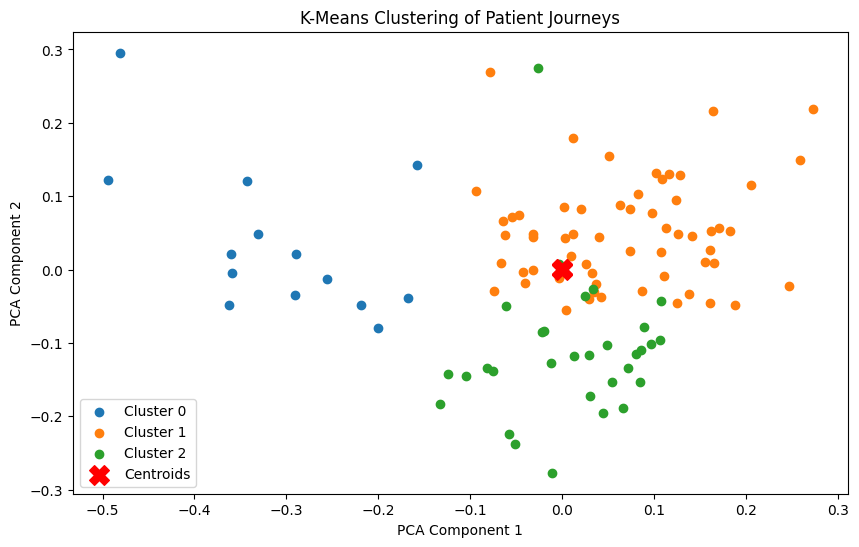

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert traces to "sentences"
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Apply K-Means clustering
num_clusters = 3  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Patient Journeys')
plt.legend()
plt.show()

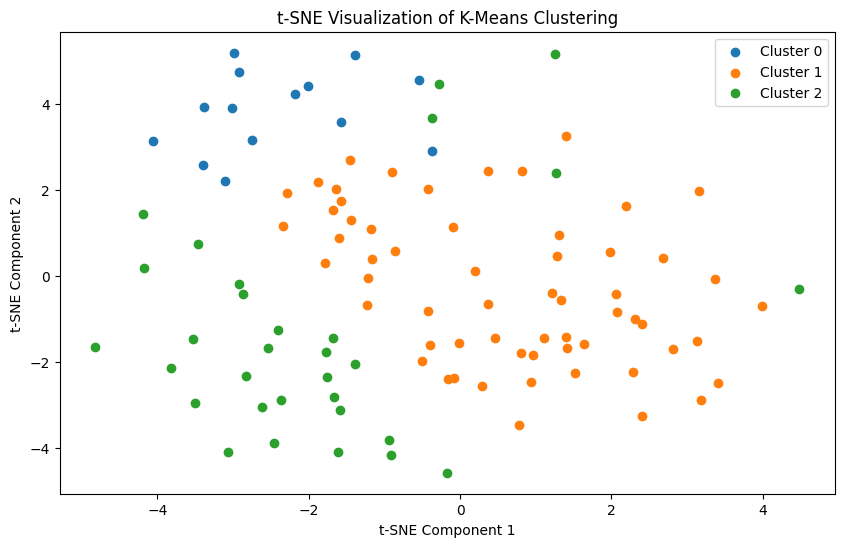

In [30]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of K-Means Clustering')
plt.legend()
plt.show()


In [31]:
import plotly.graph_objects as go
import numpy as np

# Ensure clusters is a NumPy array of integers
clusters = np.array(clusters, dtype=int)

# Verify the number of clusters
num_clusters = len(np.unique(clusters))

trace_sentences = np.array(trace_sentences)
print(trace_sentences)

# Sample patient journey per cluster
sample_traces = {i: trace_sentences[clusters == i][:5] for i in range(num_clusters)}

# Create Sankey diagram
fig = go.Figure()
for i, (cluster, traces) in enumerate(sample_traces.items()):
    fig.add_trace(go.Sankey(
        node=dict(
            pad=15, thickness=20,
            label=['Start'] + [f'Step {j+1}' for j in range(len(traces[0].split()))]
        ),
        link=dict(
            source=[0] * len(traces),
            target=list(range(1, len(traces[0].split()) + 1)),
            value=[1] * len(traces)
        )
    ))

fig.update_layout(title_text="Sankey Diagram of Clustered Patient Journeys")
fig.show()


['Radiologieverslag, Thorax Radiologieverslag, Thorax Radiologieverslag, Bekkenheupen, Echo bovenbuik, Knieonderbeen Beiderzijds Radiologieverslag, Bekkenheupen, Lumbale wervelkolom Radiologieverslag, Thorax Radiologieverslag, Echo bovenbuik Radiologieverslag, Cervicale wervelkolom, Echo bovenbuik, Mammografie, Thorax Radiologieverslag, Bekkenheupen, Bovenbeen Beiderzijds, Handpols Beiderzijds, Knieonderbeen Beiderzijds Radiologieverslag, ia seldinger cerebr. vaten Radiologieverslag, Lumbale wervelkolom Radiologieverslag, Knieonderbeen Rechts Radiologieverslag, MRI knieonderbeen Rechts Radiologieverslag, Schouder eo humerus Links Radiologieverslag, MRI schouderbovenarm Links Radiologieverslag, Thorax Radiologieverslag, Thorax Radiologieverslag, Thorax klinisch Radiologieverslag, Sinus Radiologieverslag, Thorax klinisch Radiologieverslag, Thorax Radiologieverslag, LONGPERFUSIE SCINTIGRAFIE Radiologieverslag, LONGVENTILATIE SCINTIGRAFIE Radiologieverslag, Thorax klinisch Radiologieversla